# Handwritten Digits Recognition using a simple Artificial Neural Network


In this Project, I am going to construct a model which recognizes handwritten digits using a simple ANN and the keras database MNIST.


### 1. Importing Libraries

In [23]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# keras imports for the dataset and building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
print(tf.__version__)

2.3.0


### 2. Downloading the database



In [24]:
from keras.datasets import mnist

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 3. Exploring the data

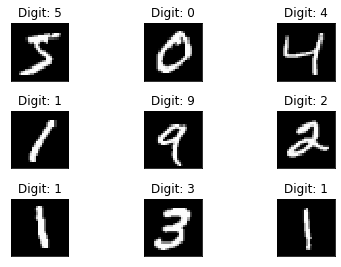

In [26]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

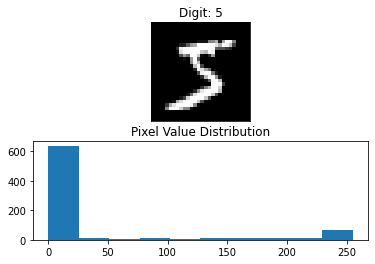

In [27]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

### 4. The Neural Network Architecture

Architecture

In [28]:
model = Sequential()

Layer #1 (Dense)

In [29]:
model.add(Dense(units=512,
                activation='relu',
                input_shape=(28*28,)))


Layer #2 (Dense)

In [30]:
model.add(Dense(units=512,
                activation='relu'))

Layer #2(Dense)

In [31]:
model.add(Dense(units=10,
                activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 5. Compiling the model

In [33]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### 6. Modifying the testing and training sets 

Reshaping the 28x28 format to a single array of 256 elements

In [34]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


### 7. One-hot encoding the target variable

In [35]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### 8. Model Fitting

In [36]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))



Epoch 1/20
469/469 - 5s - loss: 0.2178 - accuracy: 0.9341 - val_loss: 0.1071 - val_accuracy: 0.9670
Epoch 2/20
469/469 - 5s - loss: 0.0790 - accuracy: 0.9752 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 3/20
469/469 - 5s - loss: 0.0506 - accuracy: 0.9837 - val_loss: 0.0755 - val_accuracy: 0.9777
Epoch 4/20
469/469 - 5s - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 5/20
469/469 - 5s - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0824 - val_accuracy: 0.9758
Epoch 6/20
469/469 - 5s - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0737 - val_accuracy: 0.9792
Epoch 7/20
469/469 - 5s - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0865 - val_accuracy: 0.9775
Epoch 8/20
469/469 - 5s - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0827 - val_accuracy: 0.9798
Epoch 9/20
469/469 - 5s - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0772 - val_accuracy: 0.9802
Epoch 10/20
469/469 - 5s - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0869 - val_accuracy: 0.9779

### 9. Plotting the accuracy and loss curves

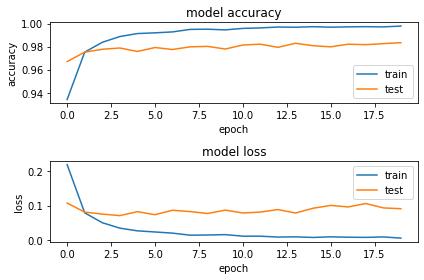

In [41]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

### 10. Model Evaluation

In [45]:
print('Model Testing Accuracy = {}'.format(sum(history.history['val_accuracy'])/20))
print('Model Testing Loss = {}'.format(sum(history.history['val_loss'])/20))

Model Testing Accuracy = 0.9792649984359741
Model Testing Loss = 0.08648662529885769


### 11.Conclusion

In this project, I did the implementation of handwritten digit recognition from the MNIST database using a tensorflow backend. I have used Google Colabs for my project as it is fast, GPU enabled and easy to set up. <br>
I made a simple Neural Network with just 3 Dense Layers. After that i fit the training and validation data into the model.
<br>The results were really satisfactory.
The model achieved a high testing accuracy of 97%.<br>
However the the accuracy would have been higher if I had used a Convolutional Neural Network like VGG16. But here I just used a simple neural network achieving an accuracy slightly lower than the VGG16 testing accuracy.
I also plotted the accuracy and loss curves.<br> This project is considered as the very basic of deep learning and Convolutional Neural Networks.
